In [1]:
# Process ACi Data and Verify the Printed Curves are Those Desired to Fit

################# User Settings #################

fitting_group_folder_path = "data/fvcb/curves/iceberg"
species_to_fit = "Iceberg"
species_variety = "Calmar"

#################################################
from src.util import *
compiledDataPath = compileACiFiles(fitting_group_folder_path)


Files compiled:
data/fvcb/curves/iceberg/2025-01-23-1403_T25_Q0.txt
data/fvcb/curves/iceberg/2025-01-23-1237_Q2000_T33.txt
data/fvcb/curves/iceberg/2025-01-23-1254_Q2000_T36.txt
data/fvcb/curves/iceberg/2025-01-23-1214_Q2000_T30.txt
data/fvcb/curves/iceberg/2025-01-23-1142_Q2000_T27.txt
data/fvcb/curves/iceberg/2025-01-23-1315_T25_Q1600.txt
data/fvcb/curves/iceberg/2025-01-23-1338_T25_Q600.txt
data/fvcb/curves/iceberg/2025-01-23-1327_T25_1200.txt
data/fvcb/curves/iceberg/2025-01-23-1351_T25_Q200.txt
data/fvcb/curves/iceberg/2025-01-23-1314_Q2000_T39.txt
data/fvcb/curves/iceberg/2025-01-23-1304_T25_Q2000.txt
Saved compiled curves to data/fvcb/curves/iceberg/curves.csv.


Done reading: 11 A/Ci curves; 2891 data points
Fitting Iceberg var. Calmar
Light response type 2: alpha and theta will be fitted.
Temperature response type 2: dHa_Jmax, dHa_TPU, Topt_Vcmax, Topt_Jmax, Topt_TPU will be fitted.
Loss at iter 199: 312.9537
Loss at iter 399: 297.4564
Loss at iter 599: 289.9861
Loss at iter 799: 285.0779
Loss at iter 999: 281.7788
Loss at iter 1199: 278.9168
Loss at iter 1399: 276.7583
Loss at iter 1599: 274.8661
Loss at iter 1799: 273.2859
Loss at iter 1999: 272.0227
Loss at iter 2199: 270.6527
Loss at iter 2399: 269.5701
Loss at iter 2599: 268.9177
Loss at iter 2799: 267.3690
Loss at iter 2999: 265.8889
Loss at iter 3199: 263.4297
Loss at iter 3399: 260.8538
Loss at iter 3599: 258.9875
Loss at iter 3799: 258.4723
Loss at iter 3999: 258.6820
Loss at iter 4199: 257.9813
Loss at iter 4399: 257.8805
Loss at iter 4599: 257.8616
Loss at iter 4799: 258.2426
Loss at iter 4999: 257.8274
Loss at iter 5199: 257.8112
Loss at iter 5399: 257.8261
Loss at iter 5599: 257.

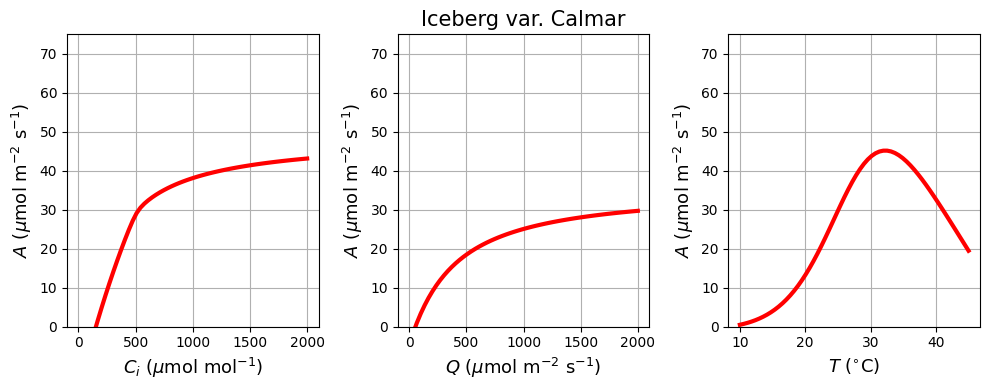

<Figure size 640x480 with 0 Axes>

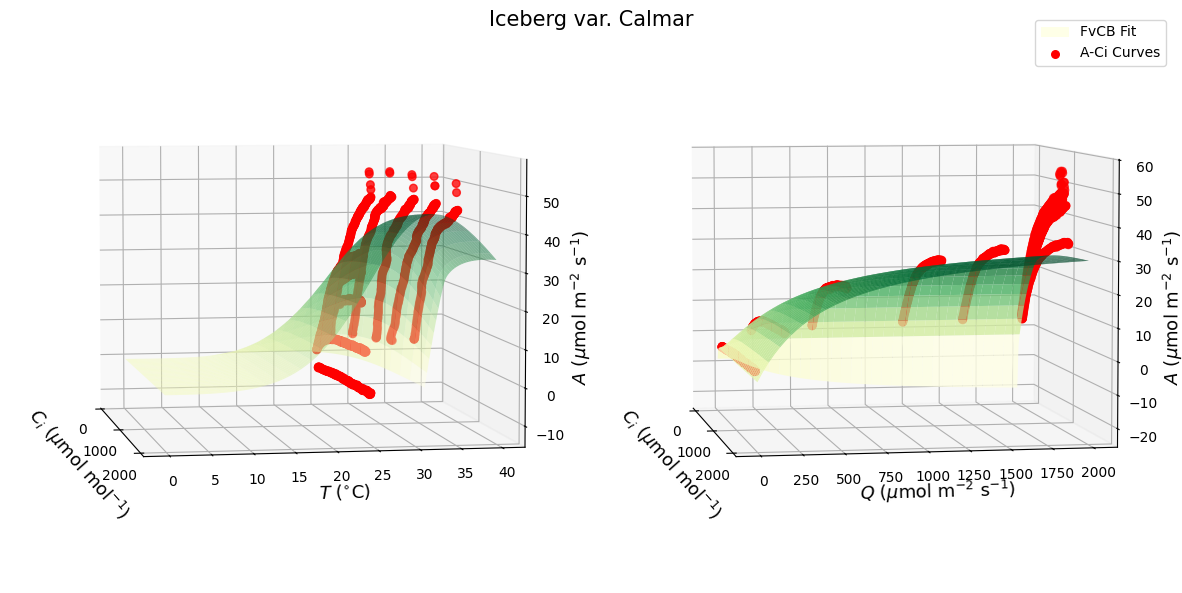

<Figure size 640x480 with 0 Axes>

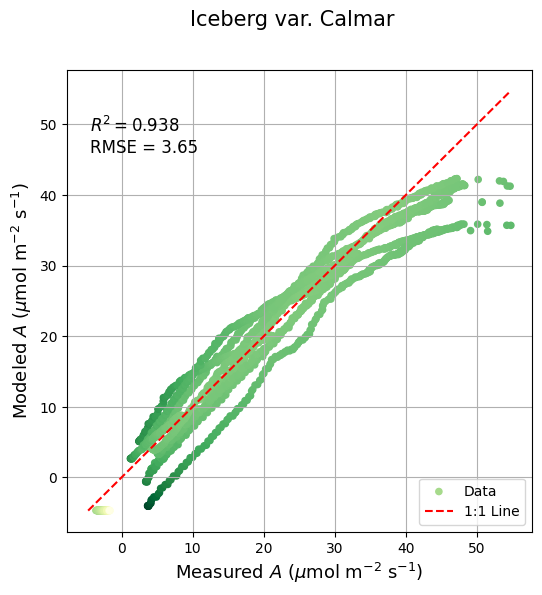

<Figure size 640x480 with 0 Axes>

In [2]:
# Fit Compiled Data to FvCB Model using PhoTorch, Save Parameters, and Plot Results

######### User Settings ##########
LightResponseType = 2
TemperatureResponseType = 2
Fitgm = False
FitGamma = False
FitKc = False
FitKo = False
saveParameters = True
plotResultingFit = True
#### Advanced Hyper Parameters ####
learningRate = 0.08
iterations = 10000
###################################

import src.fvcb.fitaci as fitaci
import src.fvcb.initphotodata as initD
import torch
import pandas as pd
from src.util import *
df = pd.read_csv(fitting_group_folder_path+"/curves.csv")
lcd = initD.initLicordata(df,preprocess=True)
device_fit = 'cpu'
lcd.todevice(torch.device(device_fit))

if(species_variety==""):
    print(f"Fitting {species_to_fit}")
else:
    print(f"Fitting {species_to_fit} var. {species_variety}")

fvcb = fitaci.initM.FvCB(lcd,LightResp_type=LightResponseType,TempResp_type=TemperatureResponseType, onefit=True, fitgamma = FitGamma, fitKc=FitKc, fitKo=FitKo, fitgm=Fitgm)
fitresult = fitaci.run(fvcb, learn_rate= learningRate, maxiteration = iterations, minloss= 1, recordweightsTF=False)
fvcb = fitresult.model
printFvCBParameters(fvcb,LightResponseType,TemperatureResponseType,Fitgm,FitGamma,FitKc,FitKo)
if(saveParameters):
    parameterPath = saveFvCBParametersToFile(species_to_fit,species_variety,fvcb,LightResponseType,TemperatureResponseType,Fitgm,FitGamma,FitKc,FitKo)
if(plotResultingFit):
    plotFvCBModelFit(species_to_fit,species_variety,parameterPath,compiledDataPath)